# Основы визуализации данных с помощью Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык визуализации данных с помощью простых графиков matplotlib. Научиться использовать визуализацию данных для проверки гипотез и валидации данных.

### Описание домашнего задания и формат сдачи

Вам предстоит выполнить задачи по визуализации данных. Для этого  впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку преподавателю.

**Важно учесть:** У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` – порядковый номер записи в датасете
* `Name` – наименование игры
* `Platform` – платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` – год выпуска игры
* `Genre` – жанр игры
* `Publisher` – наименование компании-издателя игры
* `NA_Sales` – объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` – объем продаж игры в Европе, млн. копий
* `JP_Sales` – объем продаж игры в Японии, млн. копий
* `Other_Sales` – объем продаж игры в остальных странах, млн. копий
* `Global_Sales` – объем продаж игры по всему миру, млн. копий

### Критерии оценки

**Зачет** – выполнены задачи 1-9, каждый график отформатирован и читаем

**На доработку** – выполнены не все обязательные задачи или какой-либо из графиков не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, необходимые для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Загрузка данных

In [408]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте гистограмму распределения объема продаж всех игр в Японии.

Text(0, 0.5, 'Сумма продаваемых игр')

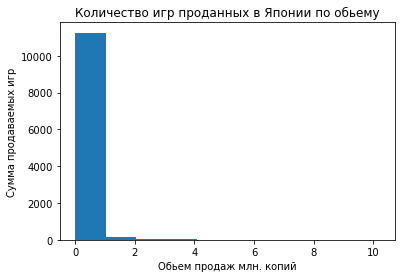

In [129]:
# Getting Data
jap_sales = df[['Name', 'JP_Sales']].groupby('Name').agg('sum')

# Draw data
plt.hist(jap_sales, bins=10)

# Decoration
plt.title('Количество игр проданных в Японии по обьему')
plt.xlabel('Продано млн. копий')
plt.ylabel('Количество игр')

### Задача 2

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах.

Text(0, 0.5, 'Продано млн. копий')

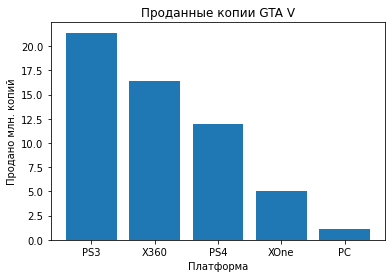

In [141]:
# Get Data
GTA_dat = df[df['Name'] == "Grand Theft Auto V"][['Platform', 'Global_Sales', 'Year']]
GTA_dat

# Drawing
plt.bar(GTA_dat['Platform'], GTA_dat['Global_Sales'])

# Decorate
plt.title('Проданные копии GTA V')
plt.xlabel('Платформа')
plt.ylabel('Продано млн. копий')

### Задача 3

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам.

([<matplotlib.axis.XTick at 0x1b0dcf3a7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

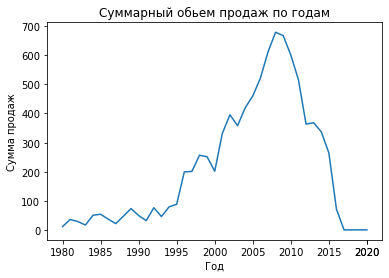

In [242]:
# Getting DATA
series = df.groupby('Year').agg('sum')['Global_Sales']

#Drawing data
plt.plot(series)

# Decorating

plt.title('Суммарный обьем продаж по годам')
plt.xlabel('Год')
plt.ylabel('Сумма продаж')
x_range = [i for i in range(int(series.index.min()), int(series.index.max())+1, 5)]
x_range.append(series.index.max())

plt.xticks(x_range)


### Задача 4

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке.

Text(0, 0.5, 'млн копий продано в мире')

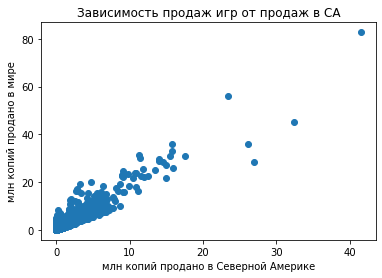

In [243]:
series = df.groupby('Name').agg('sum')[['NA_Sales', 'Global_Sales']]

plt.scatter(series['NA_Sales'], series['Global_Sales'])

plt.title('Зависимость продаж игр от продаж в СА')
plt.xlabel('млн копий продано в Северной Америке')
plt.ylabel('млн копий продано в мире')

### Задача 5

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

### Задача 6

Определите 5 издателей, имеющих наибольшие суммарные продажи во всём мире в 2013 году, и проиллюстрируйте величину их продаж на столбчатой диаграмме.

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

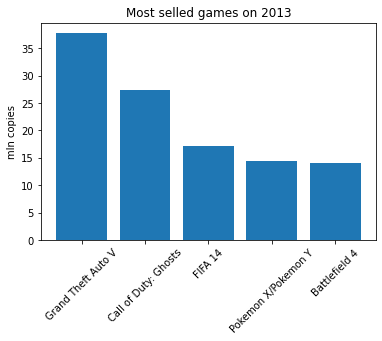

In [290]:
# Data

series = df[df['Year'] == 2013][['Name', 'Global_Sales']].groupby('Name').agg('sum')
series.sort_values('Global_Sales', ascending=False, inplace=True)
series = series[series['Global_Sales'] >=14.03 ]

series.reset_index(inplace=True)
# Drawing
plt.bar(series['Name'], series['Global_Sales'])

# Decorating
plt.title('Most selled games on 2013')
plt.ylabel('mln copies')
plt.xticks(rotation = 45)

### Задача 7

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

In [494]:
series = df[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2000) & (df['Year'] <= 2015)]

series
# counts, bins = np.histogram(series)
# plt.hist(bins[:-1], bins, weights=counts)



# plt.hist(series['Global_Sales'], bins = 20, range=(0, 20))


# # Drawing

# series
# plt.hist(series, bins=20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cntrl_summ
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,21.39
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.01


### Задача 8

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам.

Text(0, 0.5, 'mln copies')

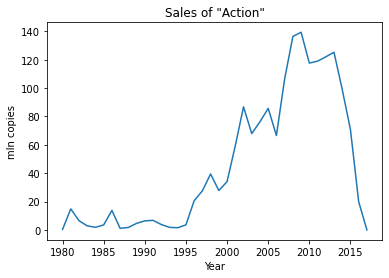

In [362]:
series = df[df['Genre']== 'Action'].groupby('Year').agg('sum')['Global_Sales']

#drawing

plt.plot(series)
plt.title('Sales of "Action"')
plt.xlabel('Year')
plt.ylabel('mln copies')

### Задача 9

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

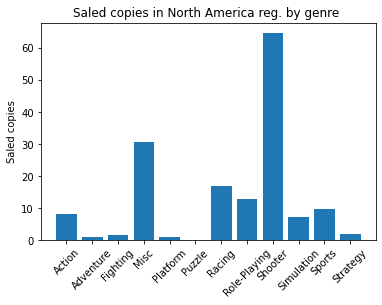

In [401]:
series = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre').agg('sum')['NA_Sales']
series = pd.DataFrame(series)
series

#drawing

plt.bar(series.index, series['NA_Sales'])
plt.title('Saled copies in North America reg. by genre ')
plt.ylabel('Saled copies')
plt.xticks(rotation = 45)

## Дополнительные (необязательные) задачи

### Задача 10

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

([<matplotlib.patches.Wedge at 0x1b0f093d400>,
 [Text(1.1614957942277644, 0.3015419042043997, 'Error'),
  Text(-1.064704471572194, -0.276413437108573, 'NoError')],
 [Text(0.677539213299529, 0.17589944411923314, '8.1%'),
  Text(-0.580747893584833, -0.15077096569558526, '91.9%')])

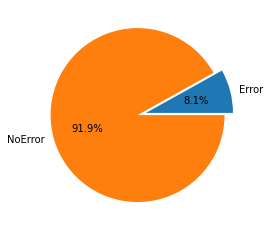

In [465]:
dat = df.copy()
dat['Cntrl_summ'] = df['NA_Sales']+ df['EU_Sales']+ df['JP_Sales']+ df['Other_Sales']
dat['Error'] = (dat['Global_Sales'] - dat['Cntrl_summ'] > 0.01)

sizes = [dat.Error.sum(),dat.Error.count() - dat.Error.sum()]
lables = ['Error', 'NoError']
ex = (0, 0.1, 0, 0)

# Draw
plt.pie(sizes, labels=lables, explode=(0.1, 0.00), autopct='%1.1f%%')

# Decorating


In [417]:
bool((1+1)>0)

True